In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler
)


In [2]:
names = ['X', 'Y', 'Z']
mammonth = pd.read_csv(r'C:\Users\art_k\PycharmProjects\intelligent_systems\datasets\mammonth\mammoth.csv', header = 0, names = names)
mammonth

,X,Y,Z
0,58.823,228.407,79.843
1,59.197,228.642,77.478
2,58.734,228.931,78.515
3,59.043,228.693,78.571
4,59.223,228.667,78.611
...,...,...,...
999773,45.775,313.390,117.697
999774,54.707,323.795,-80.527
999775,53.756,324.630,-83.203
999776,49.131,319.816,-26.200


In [3]:
mammonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999778 entries, 0 to 999777
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       999778 non-null  float64
 1   Y       999778 non-null  float64
 2   Z       999778 non-null  float64
dtypes: float64(3)
memory usage: 22.9 MB


In [4]:
mammonth.describe()

,X,Y,Z
count,999778.000000,999778.000000,999778.000000
mean,76.640520,353.807856,45.878165
std,33.858831,105.516480,89.852235
min,-22.533000,60.952000,-172.225000
25%,50.896000,289.240000,15.191250
50%,76.649000,335.656000,80.701000
75%,102.445000,435.566000,112.860000
max,169.603000,568.916000,172.238000


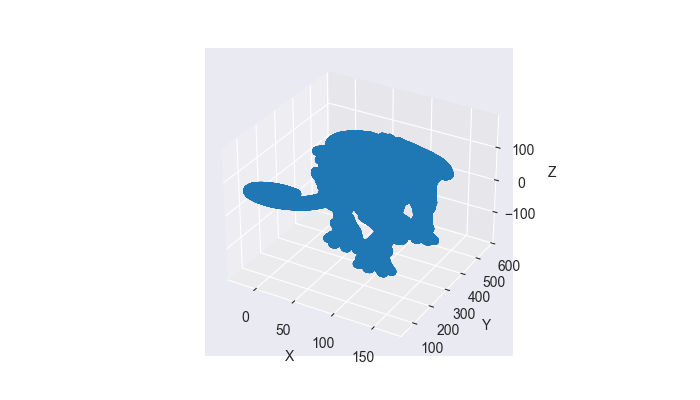

In [5]:
fig = plt.figure(figsize=(7, 4))
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Z')
ax_3d.scatter(mammonth['X'], mammonth['Y'], mammonth['Z'])
plt.show()

In [6]:
# функция для визуализациии результатов работы алгоритма TSNE с различными параметрами
def plot_tsne(X, title, tsne_kwargs, save=False, save_name="tsne"):
    tsne = TSNE(**tsne_kwargs)
    X_tsne = tsne.fit_transform(X)
    print(
        f"Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data {tsne.kl_divergence_}")
    plt.figure(figsize=(10, 10))
    sns.scatterplot(X_tsne)
    plt.grid()
    if save:
        plt.savefig(fname=f'images/{save_name}.png', dpi=300,
                    format='png',  bbox_inches='tight')
    plt.show()

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.3879362642765045


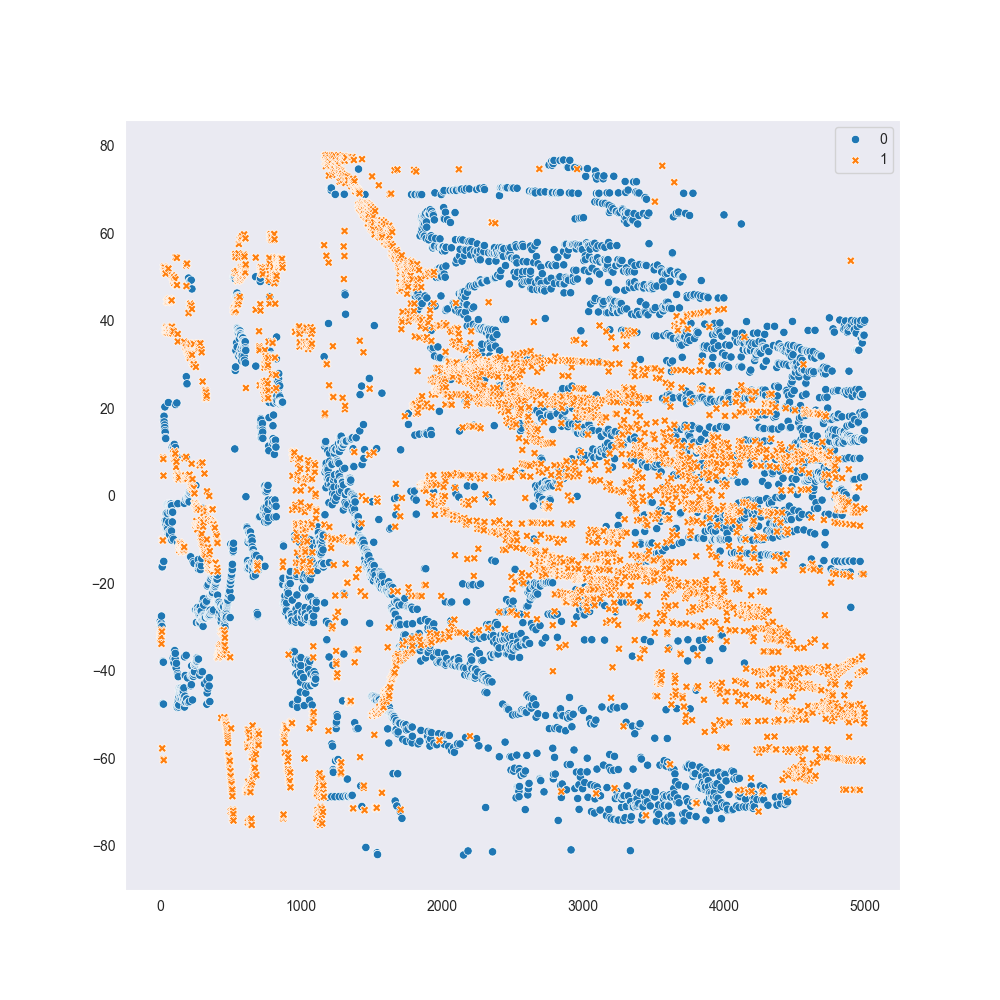

In [7]:
tsne_kwargs = {}
X =  MaxAbsScaler().fit_transform(mammonth.iloc[:5000,])
plot_tsne(X=X, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

# Кластеризация

In [8]:
X = mammonth[:5000]

In [9]:
X_scaled = MaxAbsScaler().fit_transform(X)

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [11]:
# расчёт матрицы связей
distance_matrix = linkage(X_scaled, method='ward', metric='euclidean')
#методы расчёты расстояний - 'ward', 'single','complete', 'average
distance_matrix

array([[1.45700000e+03, 1.45800000e+03, 3.93021593e-05, 2.00000000e+00],
       [3.78800000e+03, 3.79600000e+03, 5.80400922e-05, 2.00000000e+00],
       [3.94100000e+03, 3.94300000e+03, 5.89350672e-05, 2.00000000e+00],
       ...,
       [9.99000000e+03, 9.99300000e+03, 8.74492342e+00, 1.06200000e+03],
       [9.99200000e+03, 9.99600000e+03, 1.22697585e+01, 1.37200000e+03],
       [9.99500000e+03, 9.99700000e+03, 1.44710327e+01, 5.00000000e+03]])

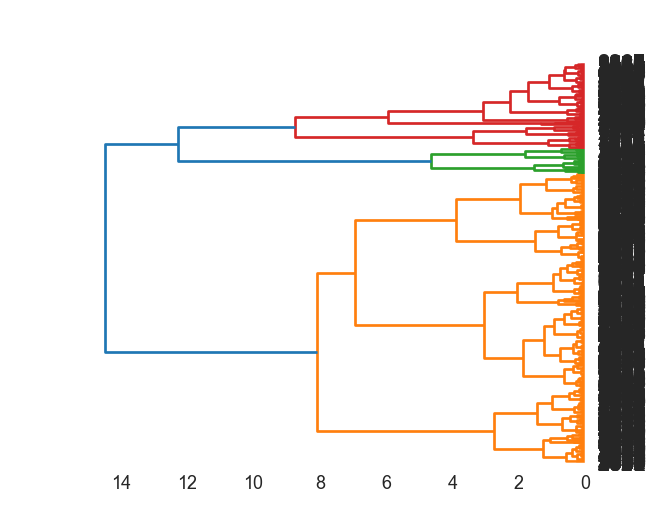

In [18]:
fig = plt.figure(figsize=(5, 4), dpi=130)
fig.patch.set_facecolor('white')
# построение дендрограммы
# разные цвета - разнвые автоматически определённые кластеры
R = dendrogram(distance_matrix, orientation='left', leaf_font_size=12)
plt.show()

# Применение алгоритма k-means

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Расчёт показателей WCSS и Silh при разном числе кластеров
WCSS = []
Silh = []
scaled_data = X_scaled
df = pd.DataFrame()
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    df['cluster_labels'] = kmeans.fit_predict(scaled_data)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(scaled_data, df['cluster_labels'], metric='euclidean'))


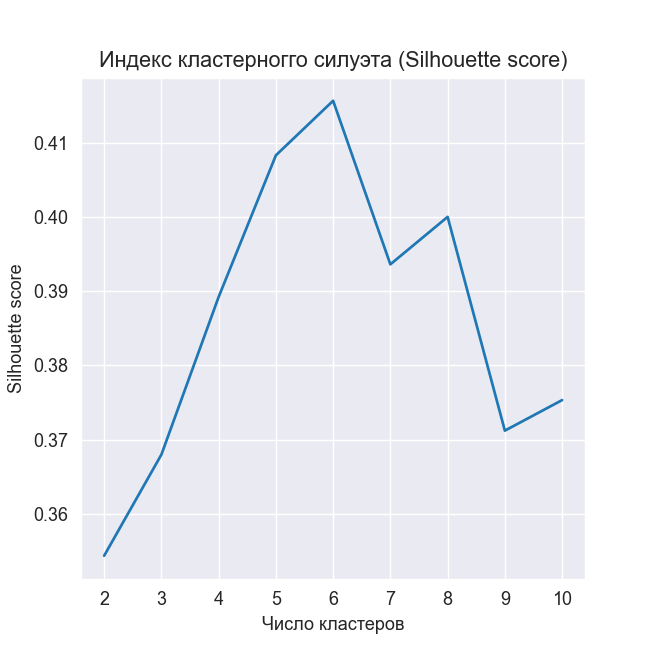

In [20]:
# построение графической зависимости для silhouette_score
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерногго силуэта (Silhouette score)")
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.show()

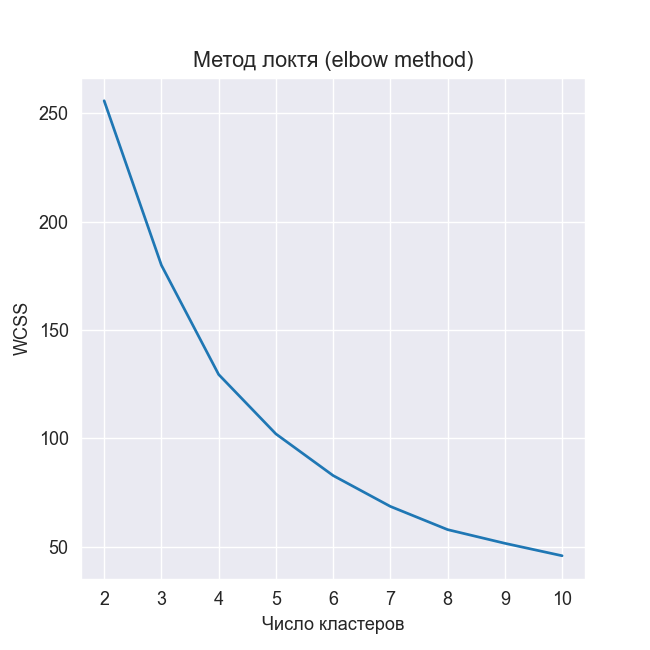

In [21]:
plt.close()
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), WCSS)
plt.title("Метод локтя (elbow method)")
plt.xlabel("Число кластеров")
plt.ylabel("WCSS")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
df['cluster_labels'] = kmeans.fit_predict(X_scaled)
plt.close()

In [32]:

# Вывод центроидов кластеров
print(kmeans.cluster_centers_)
cluster_centers_scaled = MinMaxScaler().fit_transform(kmeans.cluster_centers_)
data_with_cluster_centers = X_scaled.copy()
data_with_cluster_centers = pd.DataFrame(data_with_cluster_centers)
data_with_cluster_centers = pd.concat([data_with_cluster_centers, pd.DataFrame(cluster_centers_scaled)])
data_2_with_cluster_centers = TSNE(**tsne_kwargs).fit_transform(data_with_cluster_centers)
# dir(data_with_cluster_centers)
# data_with_cluster_centers.add(pd.DataFrame(cluster_centers_scaled))


[[0.48411626 0.40651062 0.63766862]
 [0.54281009 0.35557745 0.3562416 ]
 [0.05620071 0.20032724 0.32815885]]


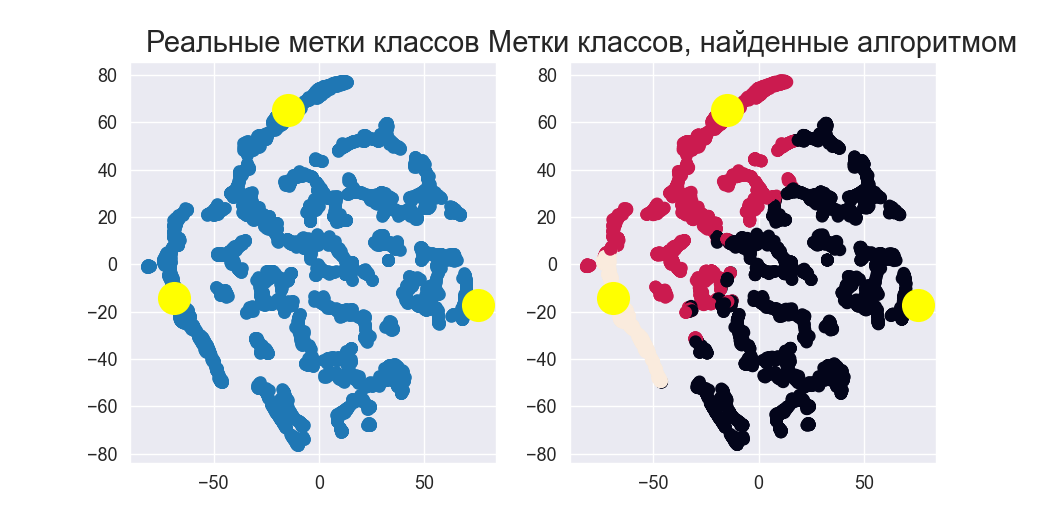

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=130)
axes[0].scatter(data_2_with_cluster_centers[:-3, 0], data_2_with_cluster_centers[:-3, 1])
axes[0].scatter(data_2_with_cluster_centers[-3:,0], data_2_with_cluster_centers[-3:,1], s=300, c='yellow', label='Centorids')
axes[0].set_title('Реальные метки классов', fontsize=16)

axes[1].scatter(data_2_with_cluster_centers[:-3, 0], data_2_with_cluster_centers[:-3, 1], c=df['cluster_labels'])
# Вывод центроидов кластеров
axes[1].scatter(data_2_with_cluster_centers[-3:,0], data_2_with_cluster_centers[-3:,1], s=300, c='yellow', label='Centorids')
axes[1].set_title('Метки классов, найденные алгоритмом', fontsize=16)
plt.show()

# fuzzy-c-means-алгоритм

In [34]:
from fuzzycmeans import FCM

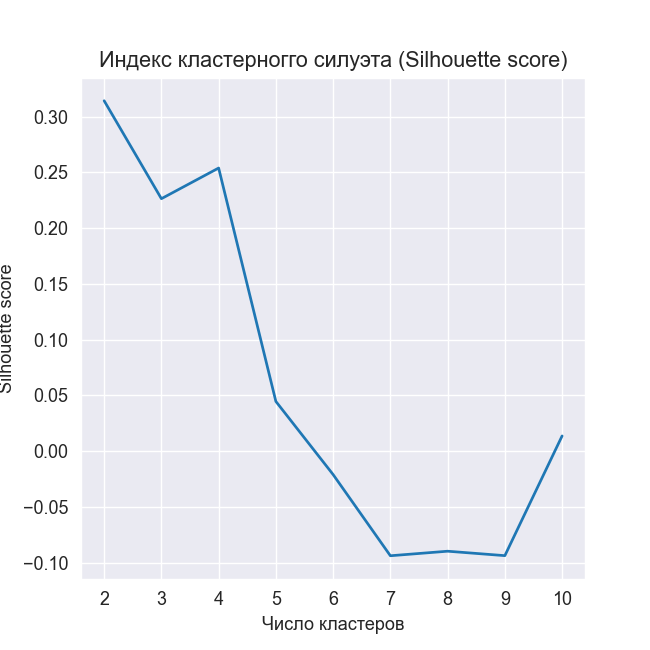

In [35]:

Silh = []
for i in range(2,11):
    fcm = FCM(n_clusters=i, max_iter=1)
    fcm.fit(X_scaled)
    df['cluster_labels'] = fcm.predict(np.array(X_scaled)).argmax(axis=1)
    Silh.append(silhouette_score(X_scaled[:,:], df['cluster_labels'], metric='euclidean'))
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерногго силуэта (Silhouette score)")
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.show()

[array([ 72.90308372, 161.21703511,  51.92859481]), array([ 76.87138681, 215.37180456,  86.7942927 ]), array([ 87.74659472, 218.0536025 , 112.81459518])]


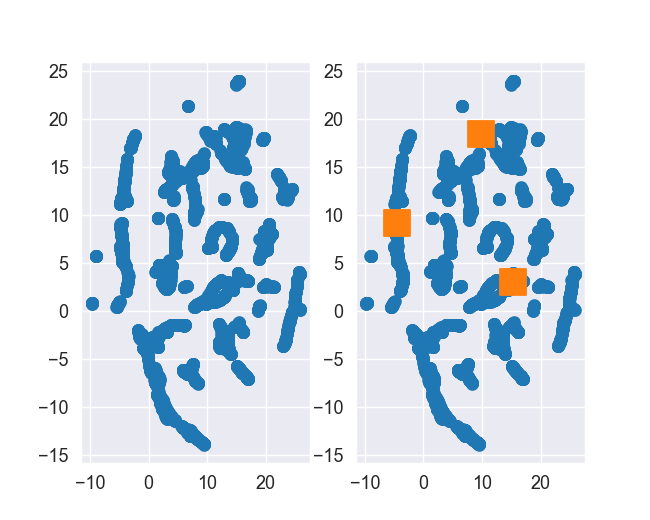

In [39]:
fcm = FCM(n_clusters=3, m = 2, max_iter=10)
fcm.fit(X)
df['cluster_labels'] = fcm.predict(np.array(X)).argmax(axis=1)
# outputs
fcm_centers = fcm.cluster_centers_
cluster_centers_scaled = MinMaxScaler().fit_transform(fcm_centers)
data_with_cluster_centers = X_scaled.copy()
data_with_cluster_centers = pd.DataFrame(data_with_cluster_centers)
data_with_cluster_centers = pd.concat([data_with_cluster_centers, pd.DataFrame(cluster_centers_scaled)])
data_2_with_cluster_centers = UMAP().fit_transform(data_with_cluster_centers)

print(fcm_centers)
fcm_labels  = fcm.u.argmax(axis=1)
# plot result
plt.close()
fig, axes = plt.subplots(1, 2, figsize=(5, 4), dpi=130)
axes[0].scatter(data_2_with_cluster_centers[:-3,0], data_2_with_cluster_centers[:-3,1])
axes[1].scatter(data_2_with_cluster_centers[:-3,0], data_2_with_cluster_centers[:-3,1])
axes[1].scatter(data_2_with_cluster_centers[-3:,0], data_2_with_cluster_centers[-3:,1],marker="s",s=200)
plt.show()

# DBSCAN-алгоритм

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
X_scaled = MaxAbsScaler().fit_transform(mammonth[:50000])
db = DBSCAN(eps=0.5, min_samples=2, metric='euclidean').fit(X_scaled)
core_sample_mask = np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_

#число кластеров без шума если он имеется
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Число кластеров {}".format(n_clusters_))
print("Число шумовых объектов: {}".format(n_noise_))


Число кластеров 1
Число шумовых объектов: 0


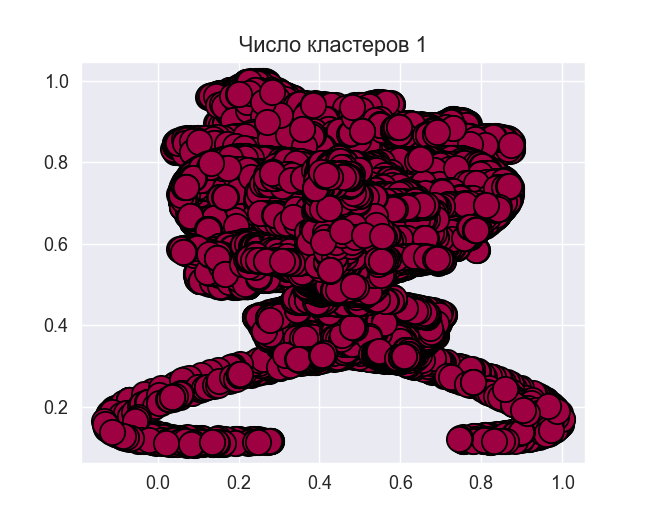

In [49]:

# визуализация
plt.close()
fig = plt.figure(figsize=(5, 4), dpi=130)
# задание цвета для маркеров, обозначающих разные классы
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # черный цвет используется для шумовых объектов
        col = [0,0,0,1] 
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask & core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14)
    
    xy = X_scaled[class_member_mask & ~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)
    
plt.title("Число кластеров {}".format(n_clusters_))
plt.show()
